# Clustering Exercise

#### Objective

To categorize the countries using socio-economic and health factors that determine the overall development of the country.

#### Problem Statement

HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.  Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.

In [210]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hierarchic
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [211]:
country_info = pd.read_csv('https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/clustering/data/country.txt')

country_info

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680


In [212]:
country_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


1. use K-means clustering and Hierarchical clustering to cluster the country into groups. (please choose the number of the cluster in a rational reason)

In [213]:
# Standardize the data (excluding the country column)
features = country_info.drop('country', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

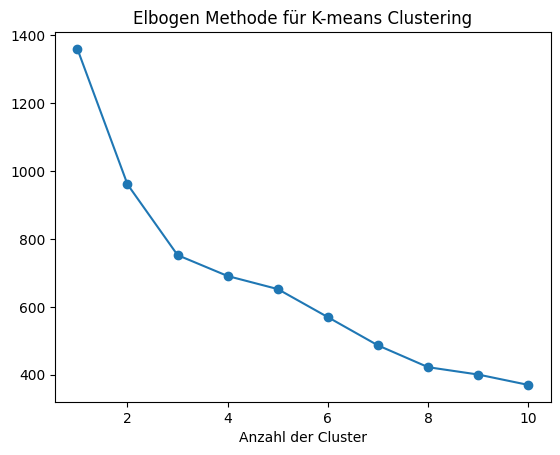

In [214]:
# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbogen Methode für K-means Clustering')
plt.xlabel('Anzahl der Cluster')
plt.show()


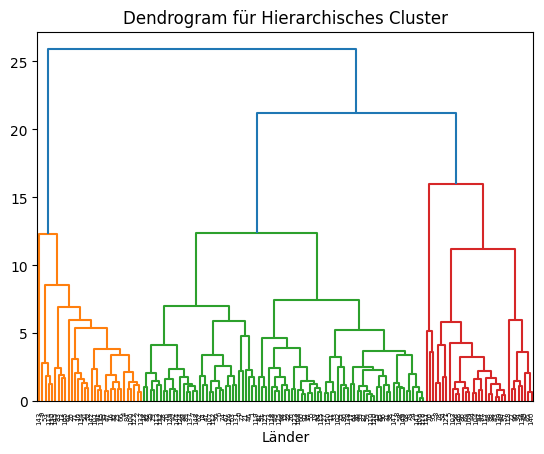

In [215]:
plt.figure()
dendrogram = hierarchic.dendrogram(hierarchic.linkage(scaled_features, method='ward'))
plt.title('Dendrogram für Hierarchisches Cluster')
plt.xlabel('Länder')
plt.show()


In [216]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
country_info['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
country_info['Hierarchical_Cluster'] = hc.fit_predict(scaled_features)

country_info


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,1,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,2,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,2,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,0
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,1,2
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,1,2
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,1,2


2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively

In [217]:
pca = PCA(n_components=2, random_state=1)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

pca_df['KMeans_Cluster'] = country_info['KMeans_Cluster']

pca_df['Hierarchical_Cluster'] = country_info['Hierarchical_Cluster']

pca_df


,PC1,PC2,KMeans_Cluster,Hierarchical_Cluster
0,-0.963435,0.658502,1,2
1,-2.319607,-0.659672,2,2
2,-2.972960,0.259851,2,1
3,3.044766,0.627254,0,0
4,-3.177162,1.088177,2,1
...,...,...,...,...
146,2.382175,-1.026547,0,0
147,0.883982,-1.365177,1,2
148,0.093241,-1.724261,1,2
149,0.974621,-0.303671,1,2


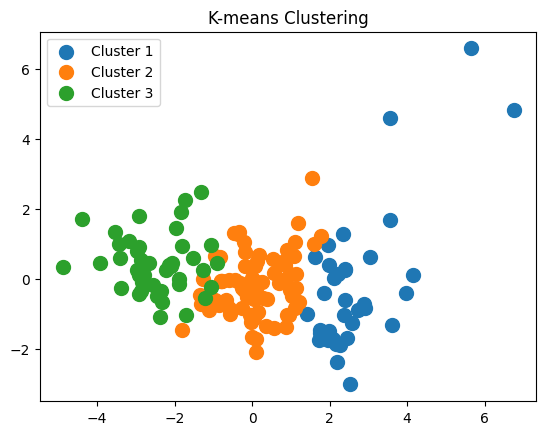

In [218]:
plt.figure()
for cluster in range(n_clusters):
    plt.scatter(pca_df[pca_df['KMeans_Cluster'] == cluster]['PC1'], 
                pca_df[pca_df['KMeans_Cluster'] == cluster]['PC2'], 
                s=100, label=f'Cluster {cluster+1}')
plt.title('K-means Clustering')
plt.legend()
plt.show()

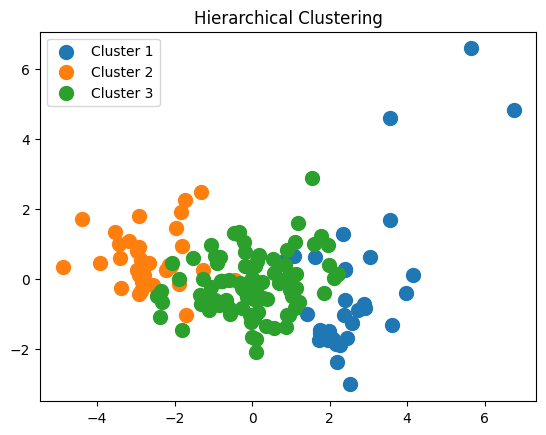

In [219]:
plt.figure()
for cluster in range(n_clusters):
    plt.scatter(pca_df[pca_df['Hierarchical_Cluster'] == cluster]['PC1'], 
                pca_df[pca_df['Hierarchical_Cluster'] == cluster]['PC2'], 
                s=100, label=f'Cluster {cluster+1}')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()


3. please write the suggestion to CEO about the country you suggest

In [220]:
kmeans_cluster = country_info.drop('country', axis=1).drop('Hierarchical_Cluster', axis=1).groupby('KMeans_Cluster').mean()
kmeans_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
KMeans_Cluster,,,,,,,,,
0,5.014286,58.360000,8.719429,51.145714,45677.142857,2.723343,80.111429,1.751714,42271.428571
1,21.985135,39.018770,6.064595,46.069809,12726.081081,7.541568,72.986486,2.318108,6773.864865
2,93.366667,28.035952,6.462143,42.852381,3866.261905,12.692738,59.095238,5.005476,1864.738095


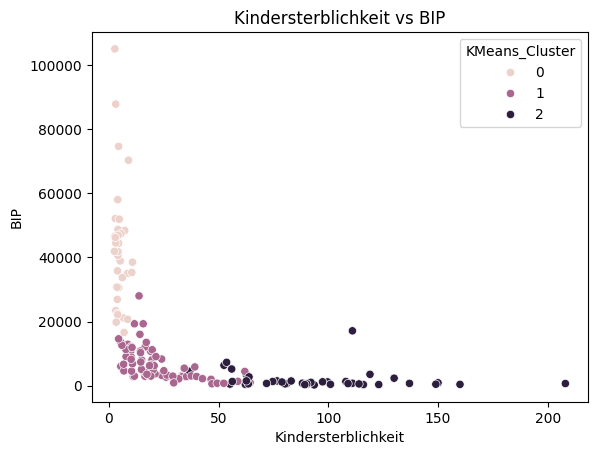

In [221]:
sns.scatterplot(x=country_info['child_mort'],y=country_info['gdpp'],hue='KMeans_Cluster',data=country_info) 
plt.title("Kindersterblichkeit vs BIP")
plt.xlabel("Kindersterblichkeit")
plt.ylabel("BIP")
plt.show()

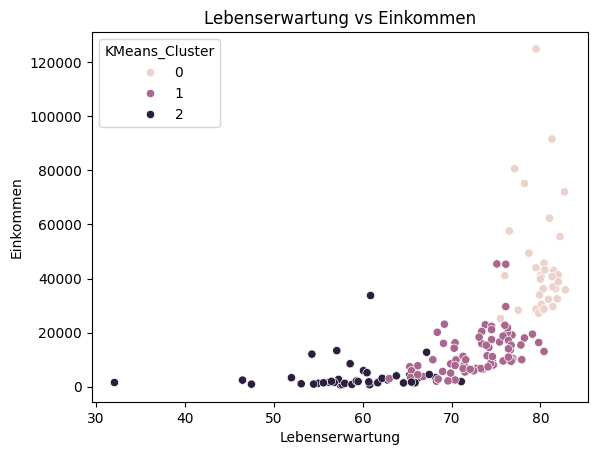

In [222]:
sns.scatterplot(x=country_info['life_expec'],y=country_info['income'],hue='KMeans_Cluster',data=country_info) 
plt.title("Lebenserwartung vs Einkommen")
plt.xlabel("Lebenserwartung")
plt.ylabel("Einkommen")
plt.show()

Aufgrund der Tabelle und den Grafiken können folgende Beschreibungen der Cluster vermutet werden:

- Cluster 0: geringe Kindersterblichkeit, hohes BIP, hohes Einkommen, hohe Lebenserwartung -> Industrieländer
- Cluster 1: Kindersterblichkeit, BIP und Einkommen im Mittelfeld, relativ hohe Lebenserwartung -> Schwellenländer
- Cluster 2: hohe Kindersterblichkeit, geringen BIP, geringes Einkommen, geringe Lebenserwartung -> Entwicklungsländer

In [223]:
def kmeans_cluster_label(cluster):
    if cluster == 0:
        return 'Industrieland'
    elif cluster == 1:
        return 'Schwellenland'
    else:
        return 'Entwicklungsland'
country_info['KMeans_Cluster'] = country_info['KMeans_Cluster'].apply(lambda x: kmeans_cluster_label(x))

country_info

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,Schwellenland,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,Entwicklungsland,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,Entwicklungsland,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,Industrieland,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,Entwicklungsland,1
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,Industrieland,0
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,Schwellenland,2
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,Schwellenland,2
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,Schwellenland,2


In [224]:
hierarchical_cluster = country_info.drop('country', axis=1).drop('KMeans_Cluster', axis=1).groupby('Hierarchical_Cluster').mean()
hierarchical_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Hierarchical_Cluster,,,,,,,,,
0,6.006061,58.100000,8.398182,48.457576,47651.515152,4.214515,79.960606,1.891515,42954.545455
1,102.056250,28.328750,6.812812,46.562500,3025.718750,11.983281,57.884375,5.262500,1484.281250
2,26.276744,38.182314,6.165349,45.464720,12017.325581,7.720279,72.045349,2.468140,6908.000000


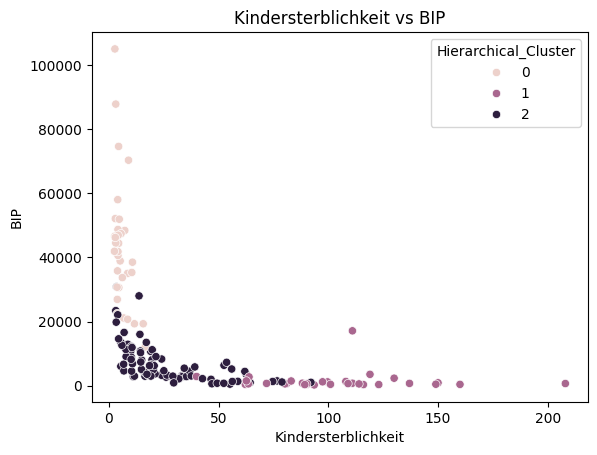

In [225]:
sns.scatterplot(x=country_info['child_mort'],y=country_info['gdpp'],hue='Hierarchical_Cluster',data=country_info) 
plt.title("Kindersterblichkeit vs BIP")
plt.xlabel("Kindersterblichkeit",)
plt.ylabel("BIP",)
plt.show()

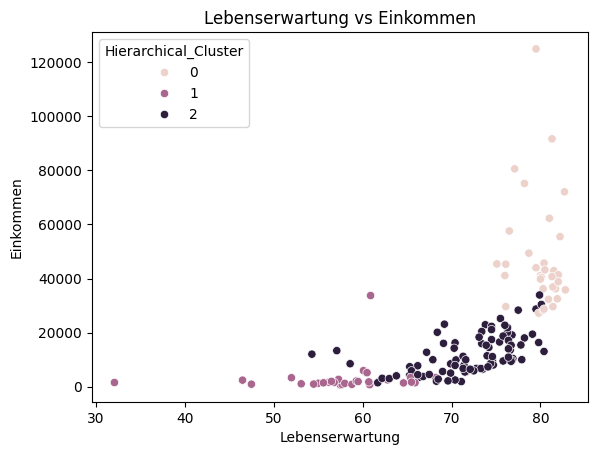

In [226]:
sns.scatterplot(x=country_info['life_expec'],y=country_info['income'],hue='Hierarchical_Cluster',data=country_info) 
plt.title("Lebenserwartung vs Einkommen")
plt.xlabel("Lebenserwartung",)
plt.ylabel("Einkommen",)
plt.show()

Aufgrund der Tabelle und den Grafiken können folgende Beschreibungen der Cluster vermutet werden:

- Cluster 0: geringe Kindersterblichkeit, hohes BIP, hohes Einkommen, hohe Lebenserwartung -> Industrieländer
- Cluster 1: hohe Kindersterblichkeit, geringen BIP, geringes Einkommen, geringe Lebenserwartung -> Entwicklungsländer
- Cluster 2: Kindersterblichkeit, BIP und Einkommen im Mittelfeld, relativ hohe Lebenserwartung -> Schwellenländer

In [227]:
def hierarchical_cluster_label(cluster):
    if cluster == 0:
        return 'Industrieland'
    elif cluster == 1:
        return 'Entwicklungsland'
    else:
        return 'Schwellenland'
country_info['Hierarchical_Cluster'] = country_info['Hierarchical_Cluster'].apply(lambda x: hierarchical_cluster_label(x))

country_info

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650,Schwellenland,Schwellenland
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480,Entwicklungsland,Schwellenland
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459,Entwicklungsland,Entwicklungsland
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,Industrieland,Industrieland
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,Entwicklungsland,Entwicklungsland
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,Industrieland,Industrieland
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200,Schwellenland,Schwellenland
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250,Schwellenland,Schwellenland
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680,Schwellenland,Schwellenland


Ich würde dem CEO empfehlen die Länder mit dem Geld zu unterstützen, die bei beiden Clustern als Entwicklungsland klassifiziert wurden. Bei den Cluster Darstellungen aus Aufgabe 2 ist zu sehen, dass sich einige Bereiche überschneiden. Möglicherweise sind die Ländern, die in beiden Clustern zu den Entwicklungsländern zählen, die die eindeutiger bestimmt werden konnten. Die  $10 Millionen  könnten entweder auf mehrere Länder aufgeteilt werden oder beispielsweise dem Land mit dem geringsten BIP gegeben werden. Auch bei mehreren Ländern (wenn es nicht alle sein können), können auch die nach dem BIP beispielsweise bestimmt werden.

In [228]:
country_info[(country_info['KMeans_Cluster'] == 'Entwicklungsland') & (country_info['Hierarchical_Cluster'] == 'Entwicklungsland')].sort_values("gdpp")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Hierarchical_Cluster
10,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Entwicklungsland,Entwicklungsland
114,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,Entwicklungsland,Entwicklungsland
4,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,Entwicklungsland,Entwicklungsland
101,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,Entwicklungsland,Entwicklungsland
20,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,Entwicklungsland,Entwicklungsland
32,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,Entwicklungsland,Entwicklungsland
84,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,Entwicklungsland,Entwicklungsland
142,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,Entwicklungsland,Entwicklungsland
2,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,Entwicklungsland,Entwicklungsland
134,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,Entwicklungsland,Entwicklungsland
